# Statistics and Optimisation Fundamental
## Tran Quang Vinh - Massachusetts Institute of Technology (MIT), US
kein schlaf und getrunken

In [ ]:
!pip install lmfit
!pip install aplpy

import numpy as np
from matplotlib import pyplot as plt

import lmfit

from scipy.stats import binom, poisson, norm
from scipy.interpolate import splrep, splev
from scipy.optimize import minimize, fsolve

from astropy.io import fits
from aplpy import FITSFigure

In [ ]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)
plt.rc('xtick', labelsize=medium_size)
plt.rc('ytick', labelsize=medium_size)
plt.rc('legend', fontsize=medium_size)
plt.rc('axes', titlesize=large_size)
plt.rc('axes', labelsize=large_size)
plt.rc('figure', titlesize=large_size)

## Distributions

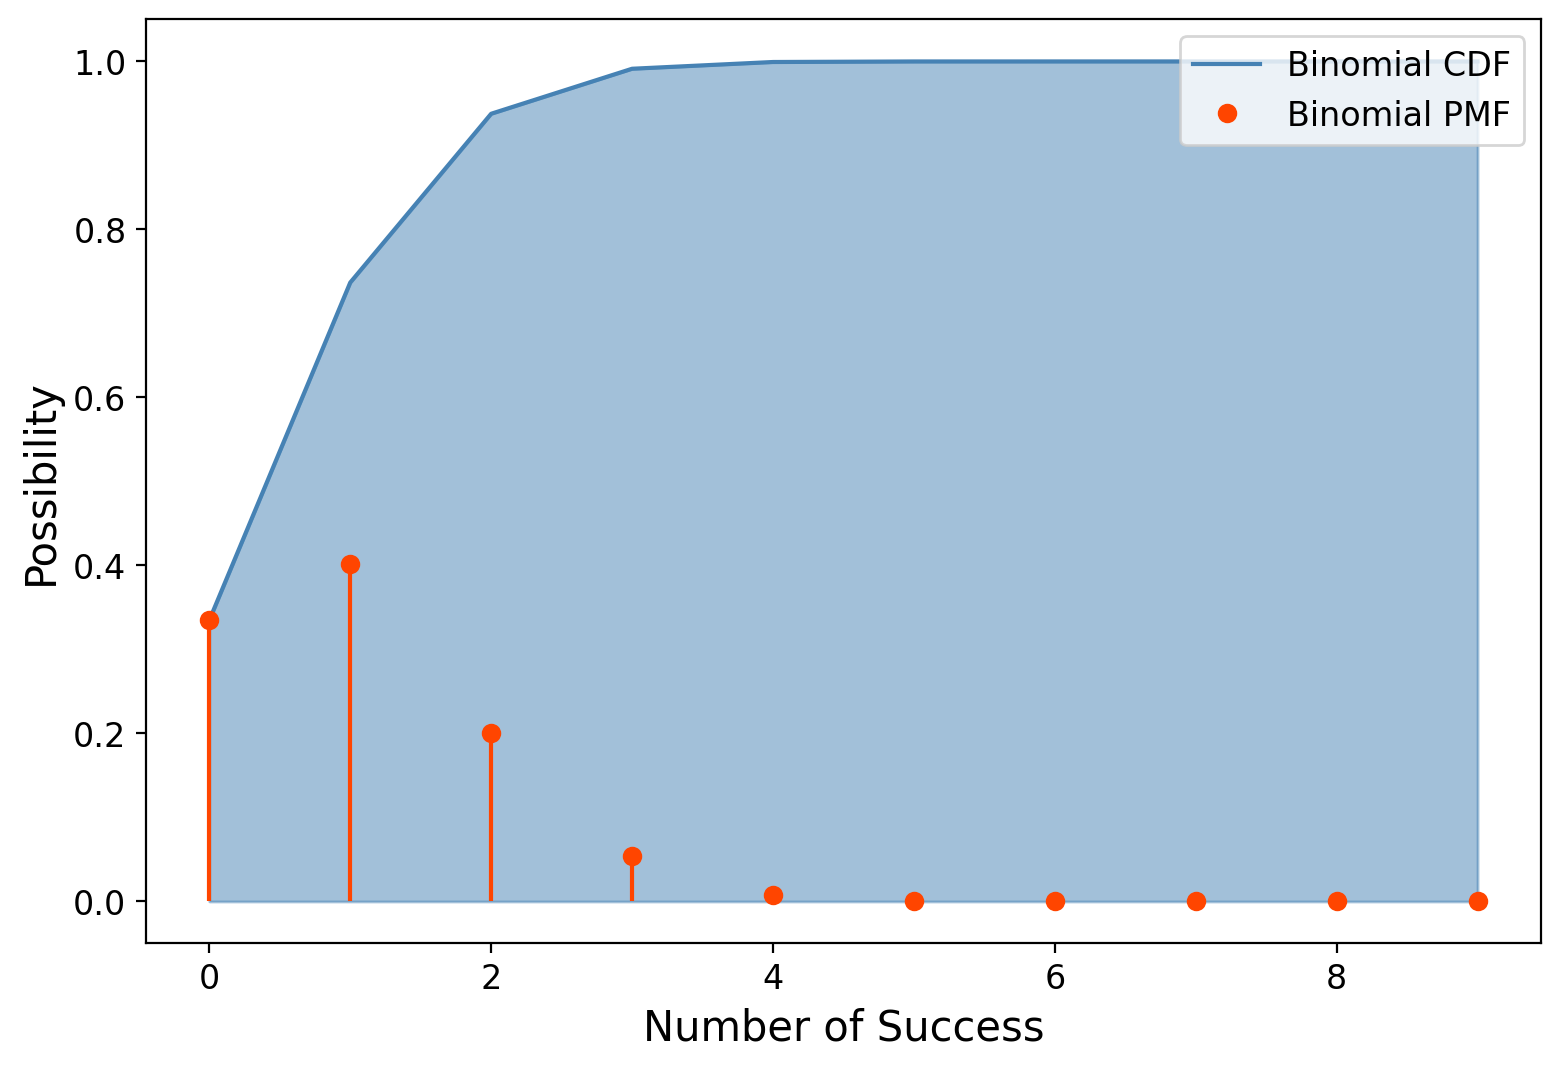

In [ ]:
plt.figure()

x = np.arange(10)
bi_pmf = binom.pmf(x,6,1/6)
bi_cdf = binom.cdf(x,6,1/6)

plt.plot(x,bi_cdf,color='steelblue',label='Binomial CDF')
plt.fill_between(x,bi_cdf,color='steelblue',alpha=0.5)

plt.plot(x,bi_pmf,'o',color='orangered',label='Binomial PMF')
plt.vlines(x, 0, bi_pmf, color=plt.gca().lines[-1].get_color())

plt.xlabel('Number of Success')
plt.ylabel('Possibility')

plt.legend(loc='upper right')

plt.show()

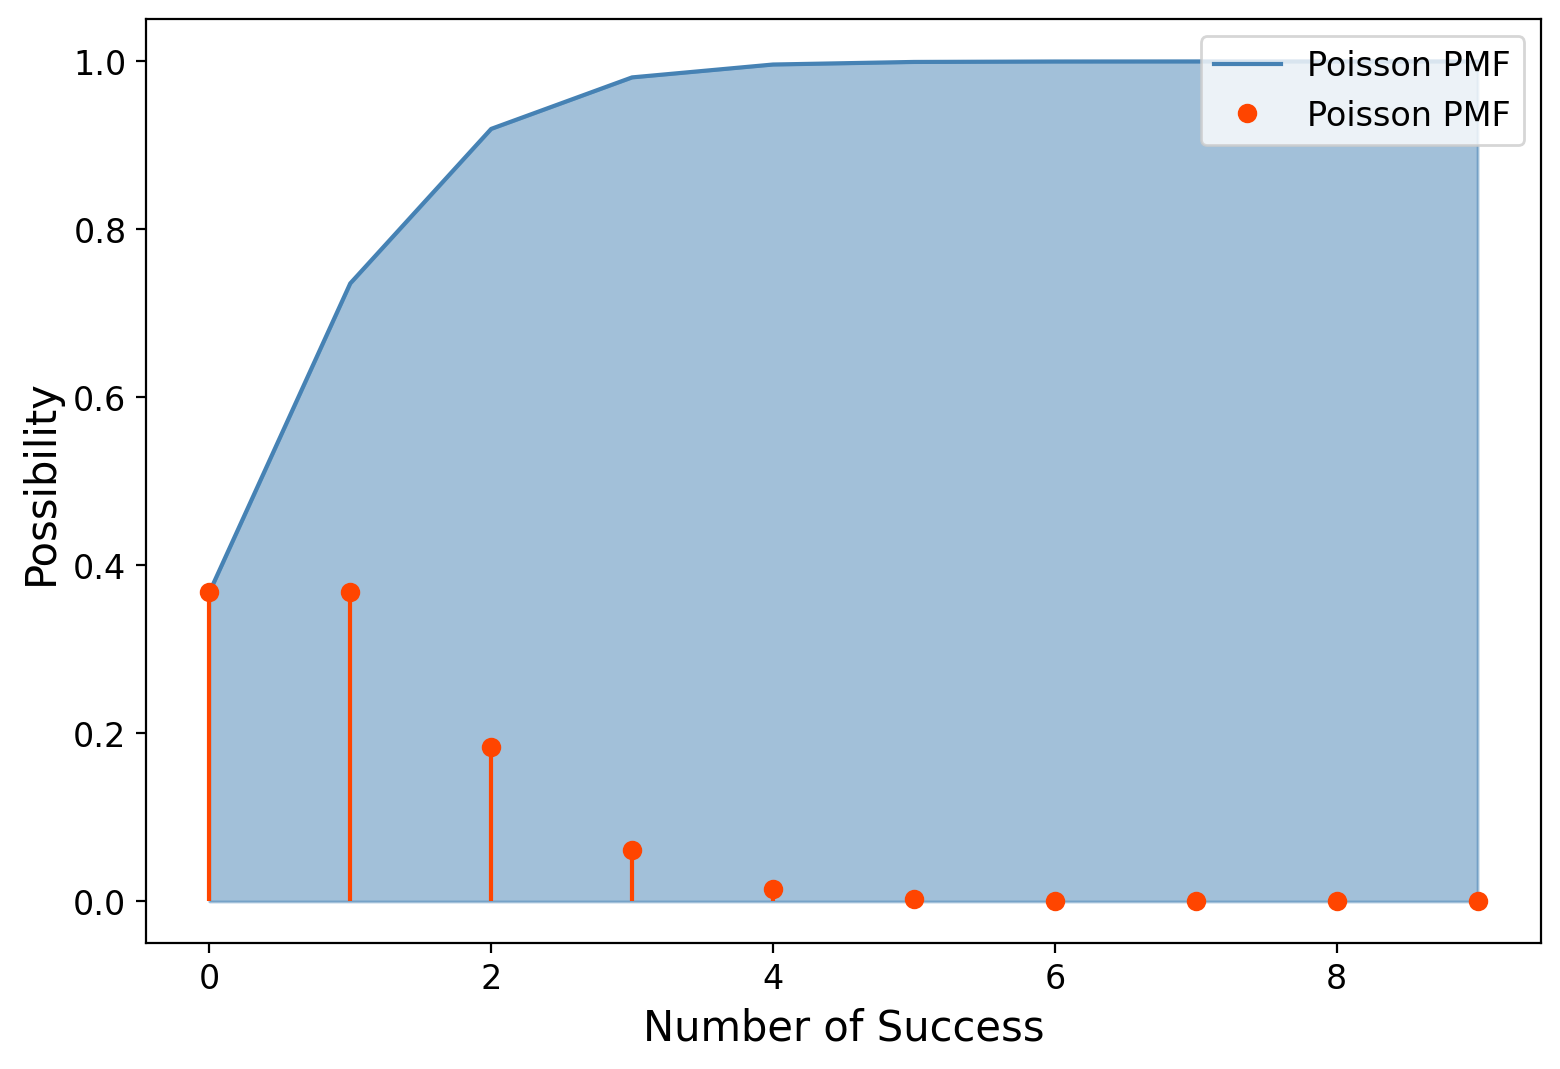

In [ ]:
plt.figure()

x = np.arange(10)
po_pmf = poisson.pmf(x,1)
po_cdf = poisson.cdf(x,1)

plt.plot(x,po_cdf,color='steelblue',label='Poisson PMF')
plt.fill_between(x,po_cdf,color='steelblue',alpha=0.5)

plt.plot(x,po_pmf,'o',color='orangered',label='Poisson PMF')
plt.vlines(x, 0, po_pmf, color=plt.gca().lines[-1].get_color())

plt.xlabel('Number of Success')
plt.ylabel('Possibility')

plt.legend(loc='upper right')
plt.show()

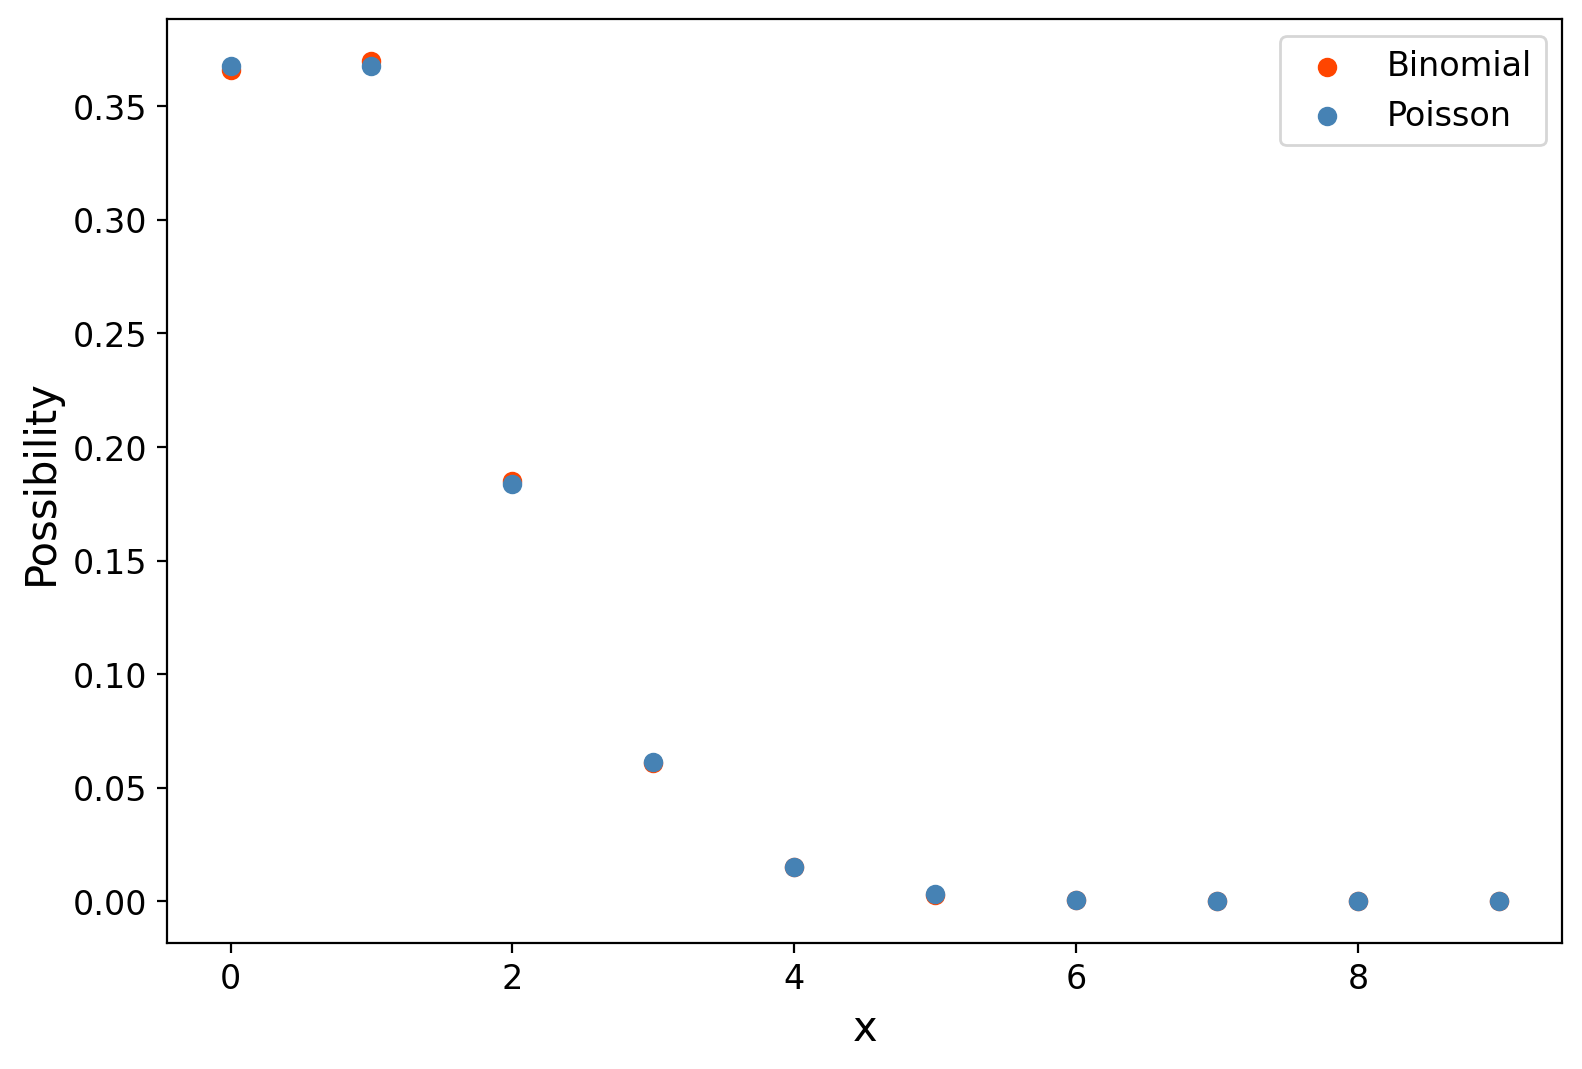

In [ ]:
plt.figure()

x = np.arange(10)
new_bi_pmf = binom.pmf(x,100,1/100)

plt.scatter(x,new_bi_pmf,color='orangered',label='Binomial')
plt.scatter(x,po_pmf,color='steelblue',label='Poisson')

plt.xlabel('x')
plt.ylabel('Possibility')

plt.legend()

plt.show()

In [ ]:
mux,muy = 1,2
sigmax,sigmay = 0.4,0.2

x = np.random.normal(mux,sigmax,10000)
y = np.random.normal(muy,sigmay,10000)

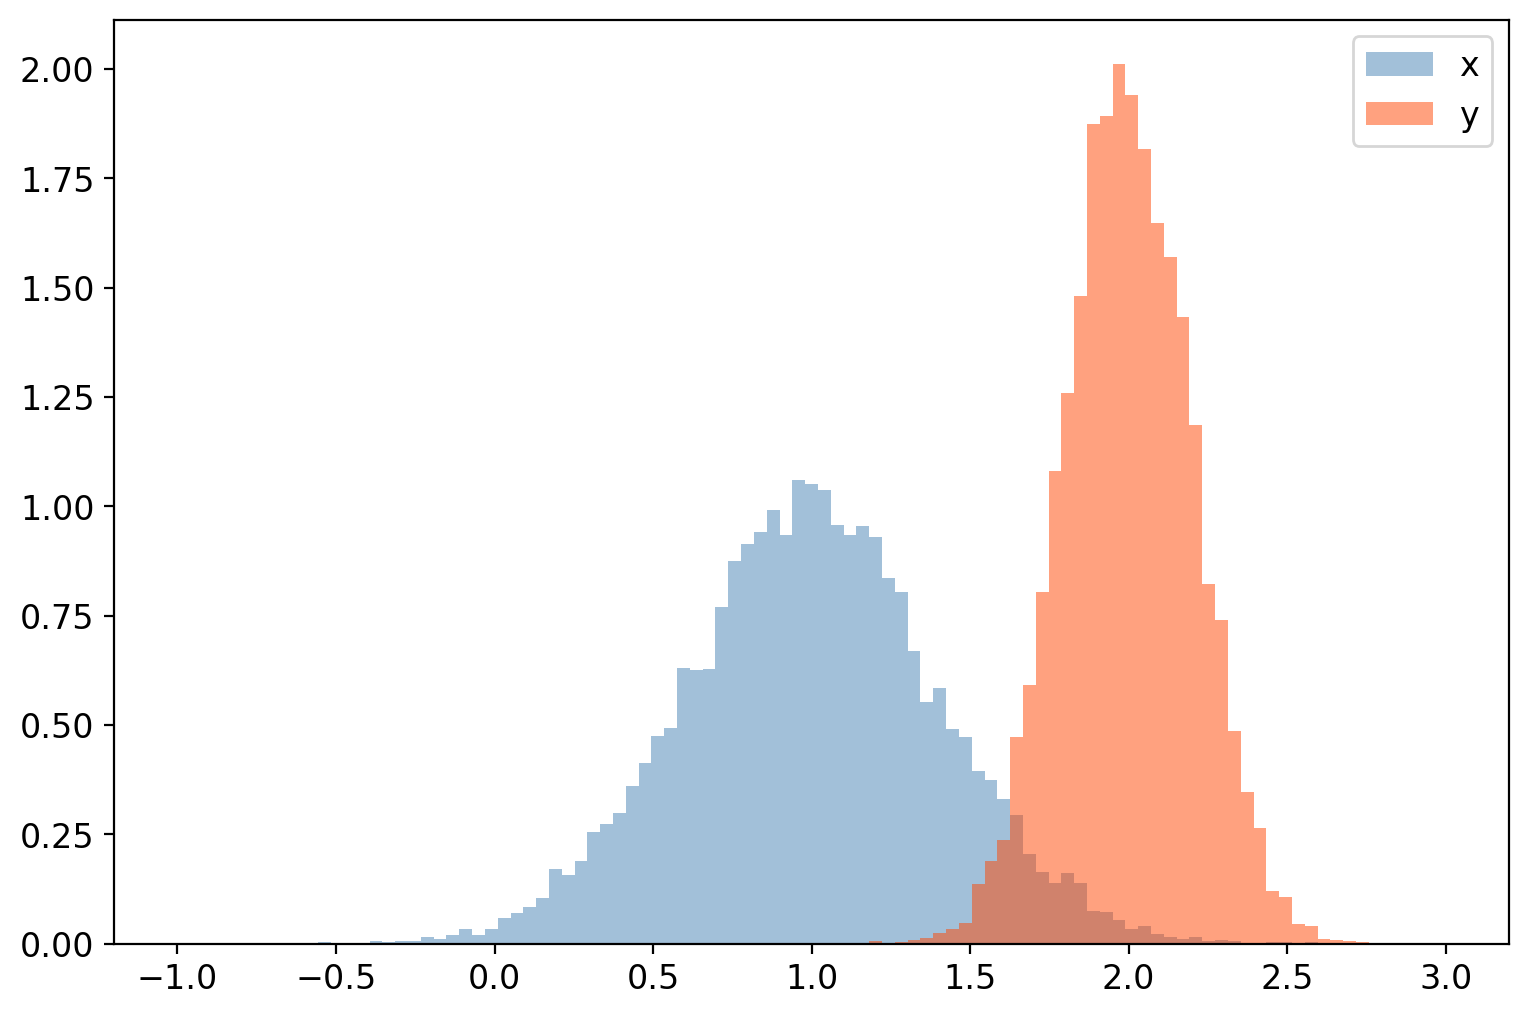

In [ ]:
plt.figure()

bins = np.linspace(-1,3,100)

plt.hist(x,bins=bins,density=True,alpha=0.5,color='steelblue',label='x')
plt.hist(y,bins=bins,density=True,alpha=0.5,color='orangered',label='y')

plt.legend()
plt.show()

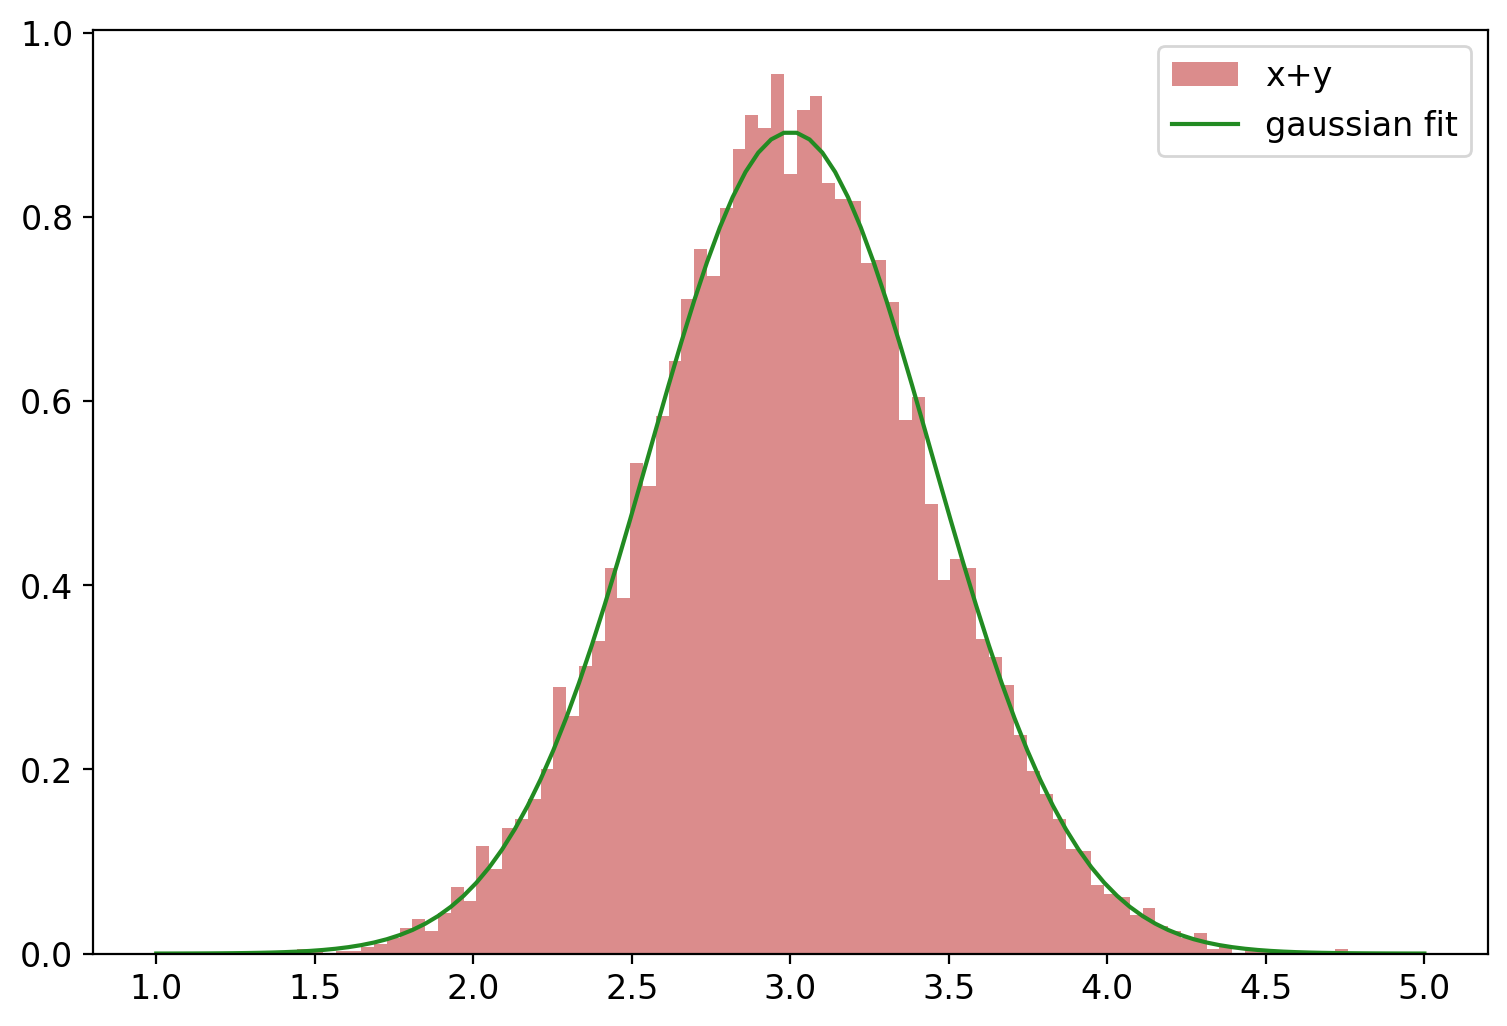

In [ ]:
xy = x+y

plt.figure()

bins = np.linspace(1,5,100)

plt.hist(xy,bins=bins,density=True,alpha=0.7,color='indianred',label='x+y')

plt.plot(bins,norm.pdf(bins,mux+muy,np.sqrt(sigmax**2+sigmay**2)),color='forestgreen',label='gaussian fit')

plt.legend()
plt.show()

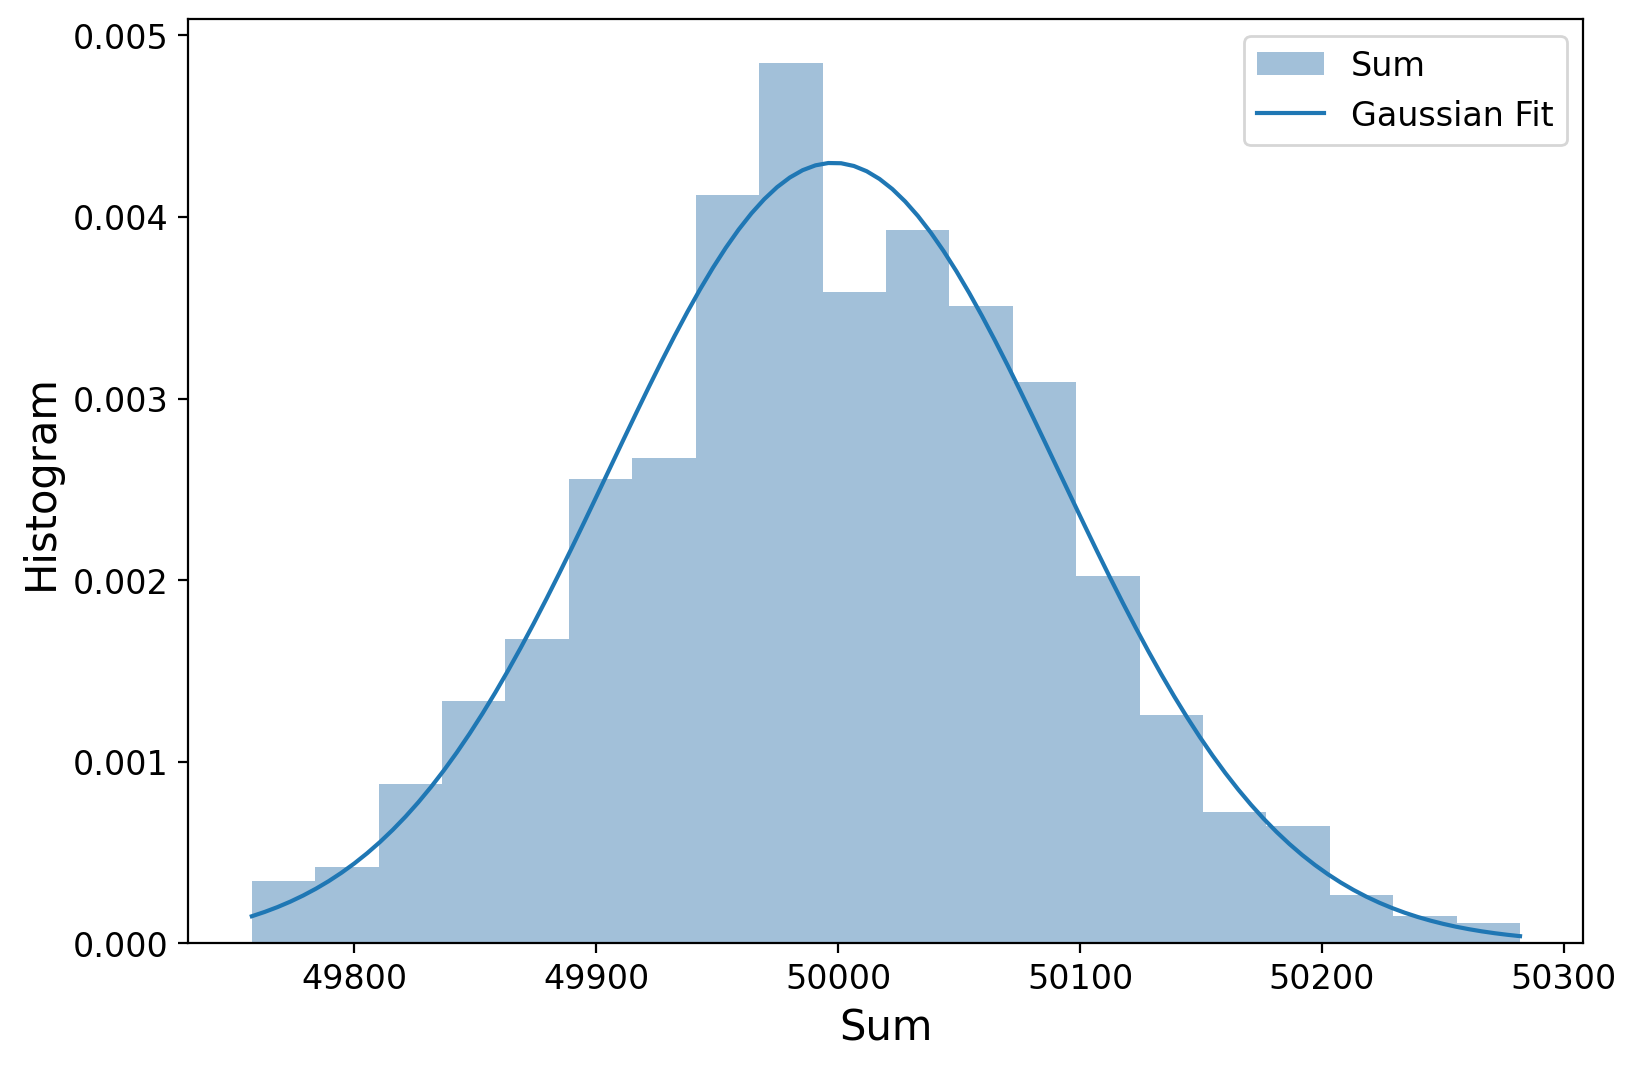

In [ ]:
def sample_uniform_sum(nsum=100000,niter=1000):
    return np.array([np.sum(np.random.uniform(0,1,size=nsum)) for i in range(niter)])

plt.figure()

bins = 20

sum_set = sample_uniform_sum()

plt.hist(sum_set,bins=bins,density=True,alpha=0.5,color='steelblue',label='Sum')

sum_array = np.linspace(np.min(sum_set),np.max(sum_set),100)
plt.plot(sum_array,norm.pdf(sum_array,loc=np.mean(sum_set),scale=np.std(sum_set)),label='Gaussian Fit')

plt.xlabel('Sum')
plt.ylabel('Histogram')

plt.legend()

plt.show()

## Gradient Descent

In [ ]:
a = -3
b = -2

def parabol_func(x):
    return (x+a)**2 + b

def parabol_diff(x):
    return 2*(x+a)

def gradient_descent(x0,alpha,iter=1000):
    xs = np.array([x0])

    for i in range(iter):
        dx = -alpha*parabol_diff(xs[-1])
        xs = np.append(xs,xs[-1]+dx)

    return xs

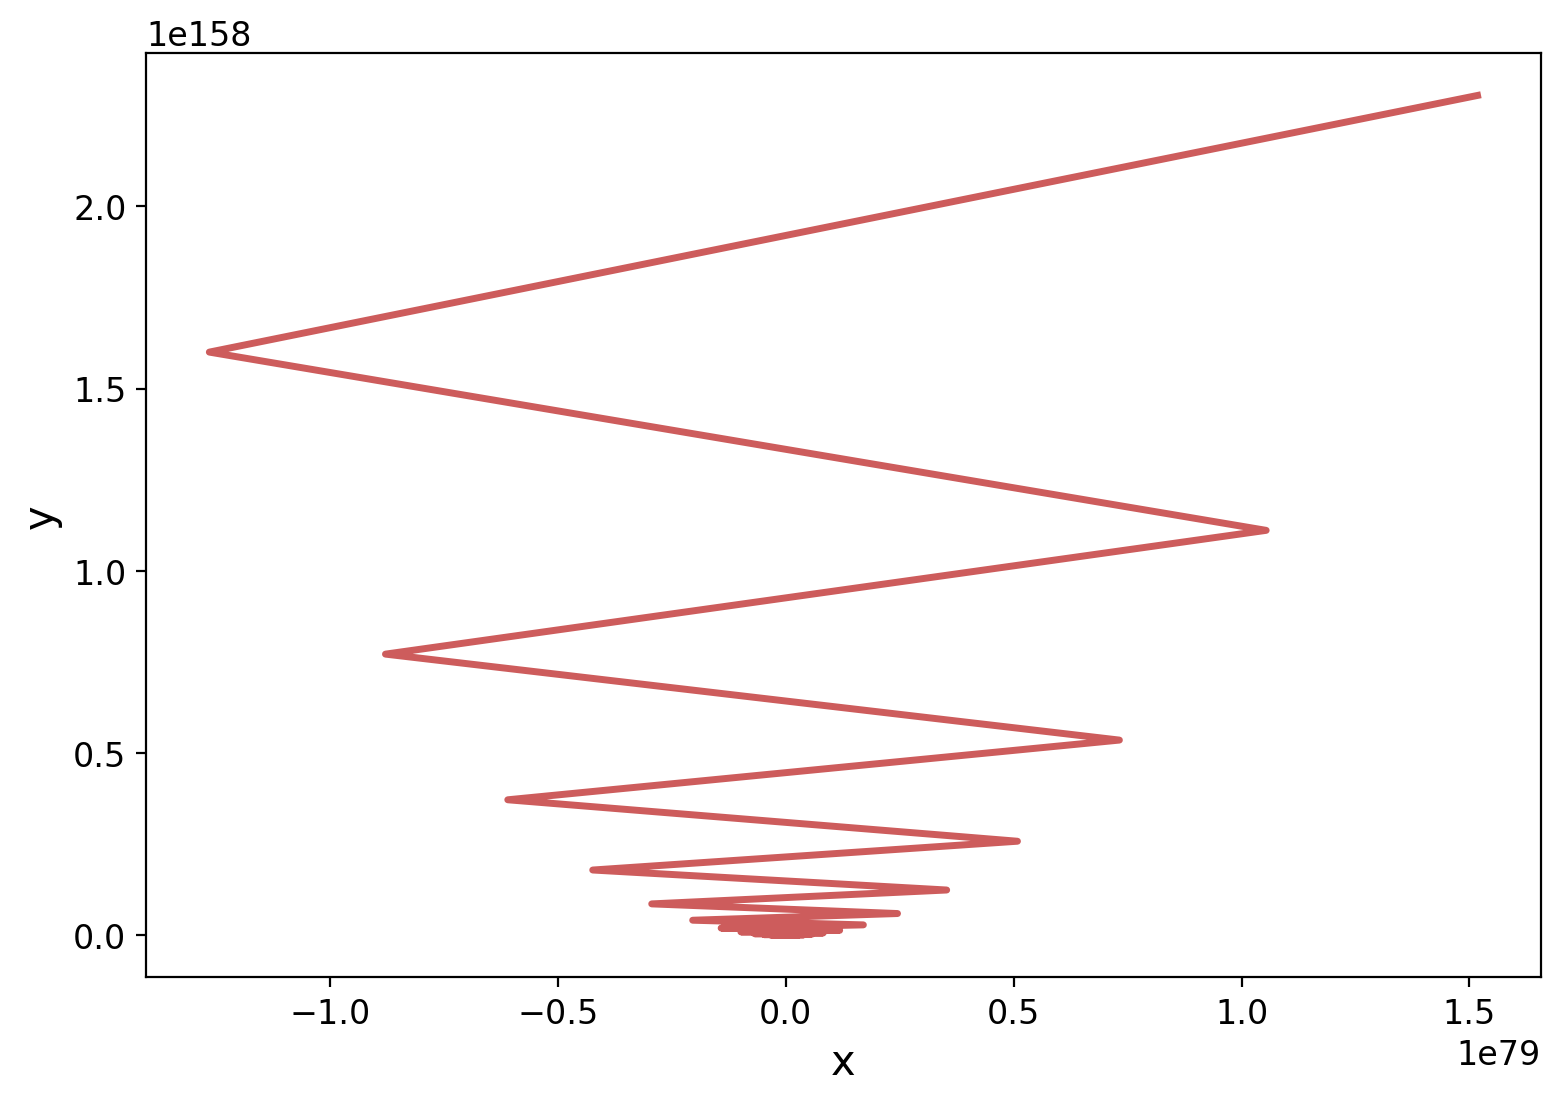

In [ ]:
x_range = np.linspace(0,6,100)

plt.figure()

plt.plot(x_range,parabol_func(x_range),color='steelblue',alpha=0.5)

x_desc = gradient_descent(4,1.1)

plt.plot(x_desc,parabol_func(x_desc),linewidth=2.5,color='indianred')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

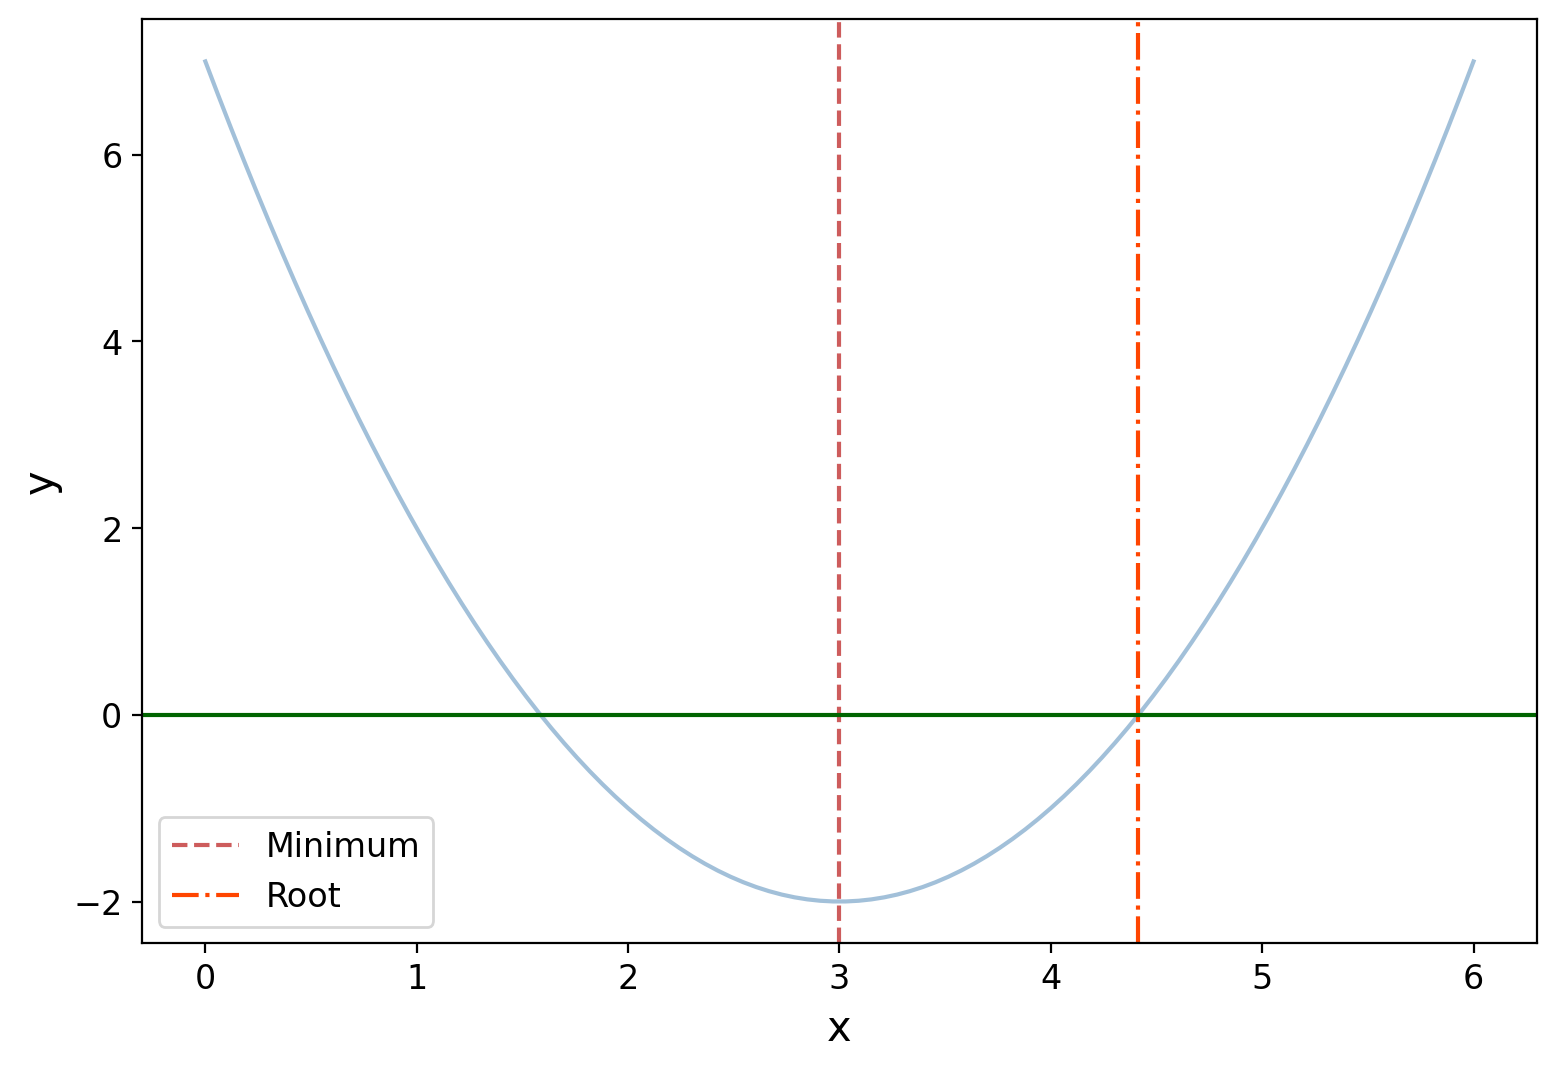

In [ ]:
xmin = minimize(parabol_func,4).x[0]
xroot = fsolve(parabol_func,4)[0]

plt.figure()

plt.plot(x_range,parabol_func(x_range),color='steelblue',alpha=0.5)

plt.axvline(xmin,linestyle='--',color='indianred',label='Minimum')
plt.axvline(xroot,linestyle='-.',color='orangered',label="Root")

plt.axhline(0,color='darkgreen')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

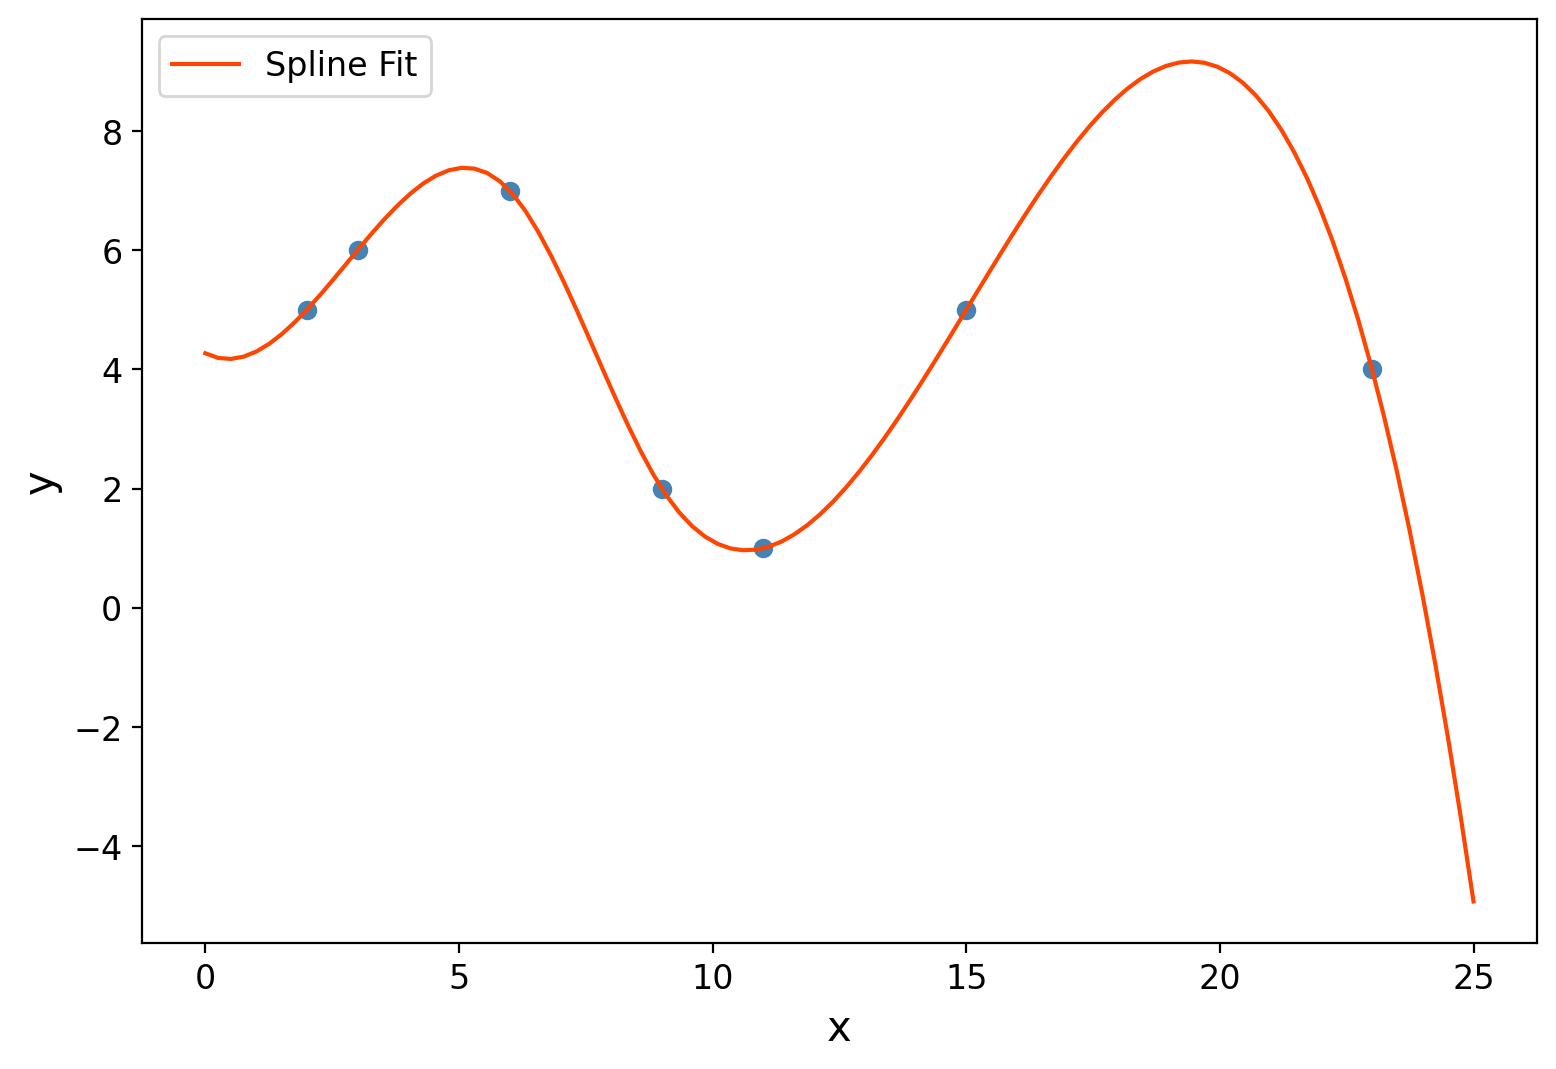

In [ ]:
xs = np.array([2,3,6,9,11,15,23])
ys = np.array([5,6,7,2,1,5,4])

spl_rep = splrep(xs,ys)
def spline_approx(x):
    return splev(x,spl_rep)

plt.figure()

plt.scatter(xs,ys,color='steelblue')

x_range = np.linspace(0,25,100)
plt.plot(x_range,spline_approx(x_range),color='orangered',label='Spline Fit')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

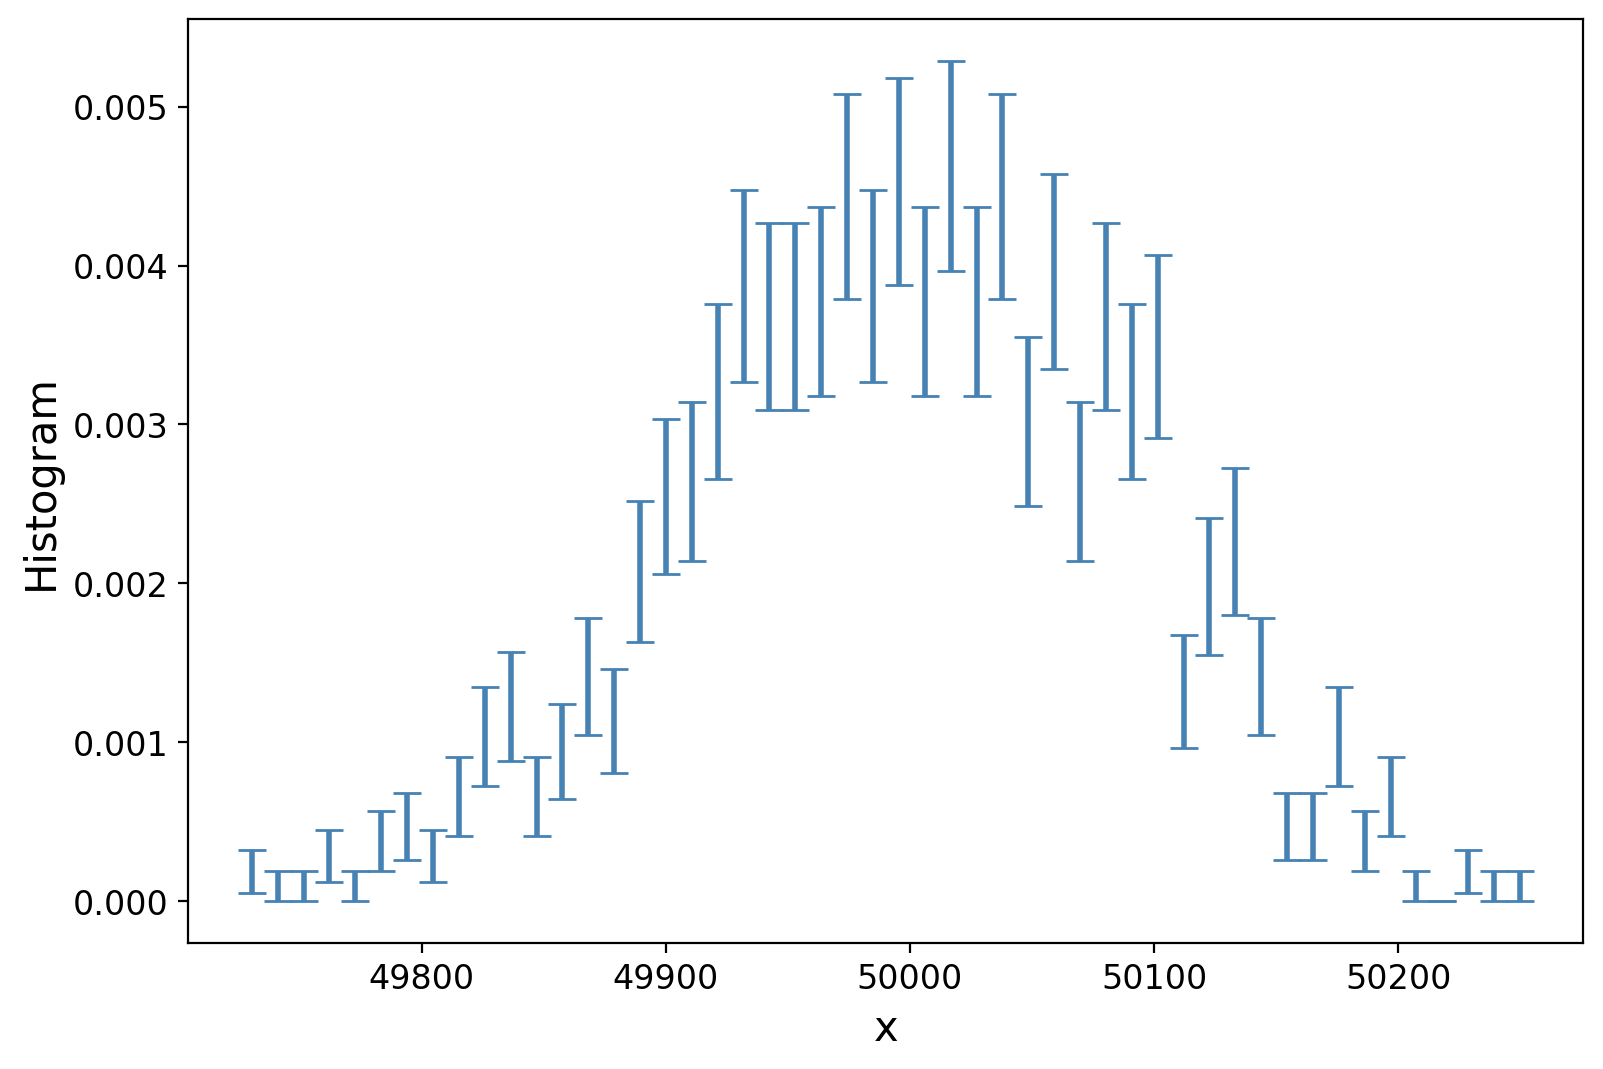

In [ ]:
def sample_uniform_sum(nsum=100000,niter=1000):
    return np.array([np.sum(np.random.uniform(0,1,size=nsum)) for i in range(niter)])

hist,bins = np.histogram(sample_uniform_sum(),bins=50)
hist_err = np.sqrt(hist)
bin_centers = (bins[1:]+bins[:-1])/2

scalling = 1/np.sum(hist)/(bins[-1]-bins[0])*bin_centers.shape[0]

hist,hist_err = hist*scalling,hist_err*scalling

plt.figure()

plt.errorbar(bin_centers,hist,hist_err,
             color='steelblue',fmt=' ',
             elinewidth=2,capsize=5)

plt.xlabel('x')
plt.ylabel('Histogram')

plt.show()

## Least Squares Method

<ipython-input-20-e158ceb70c94>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


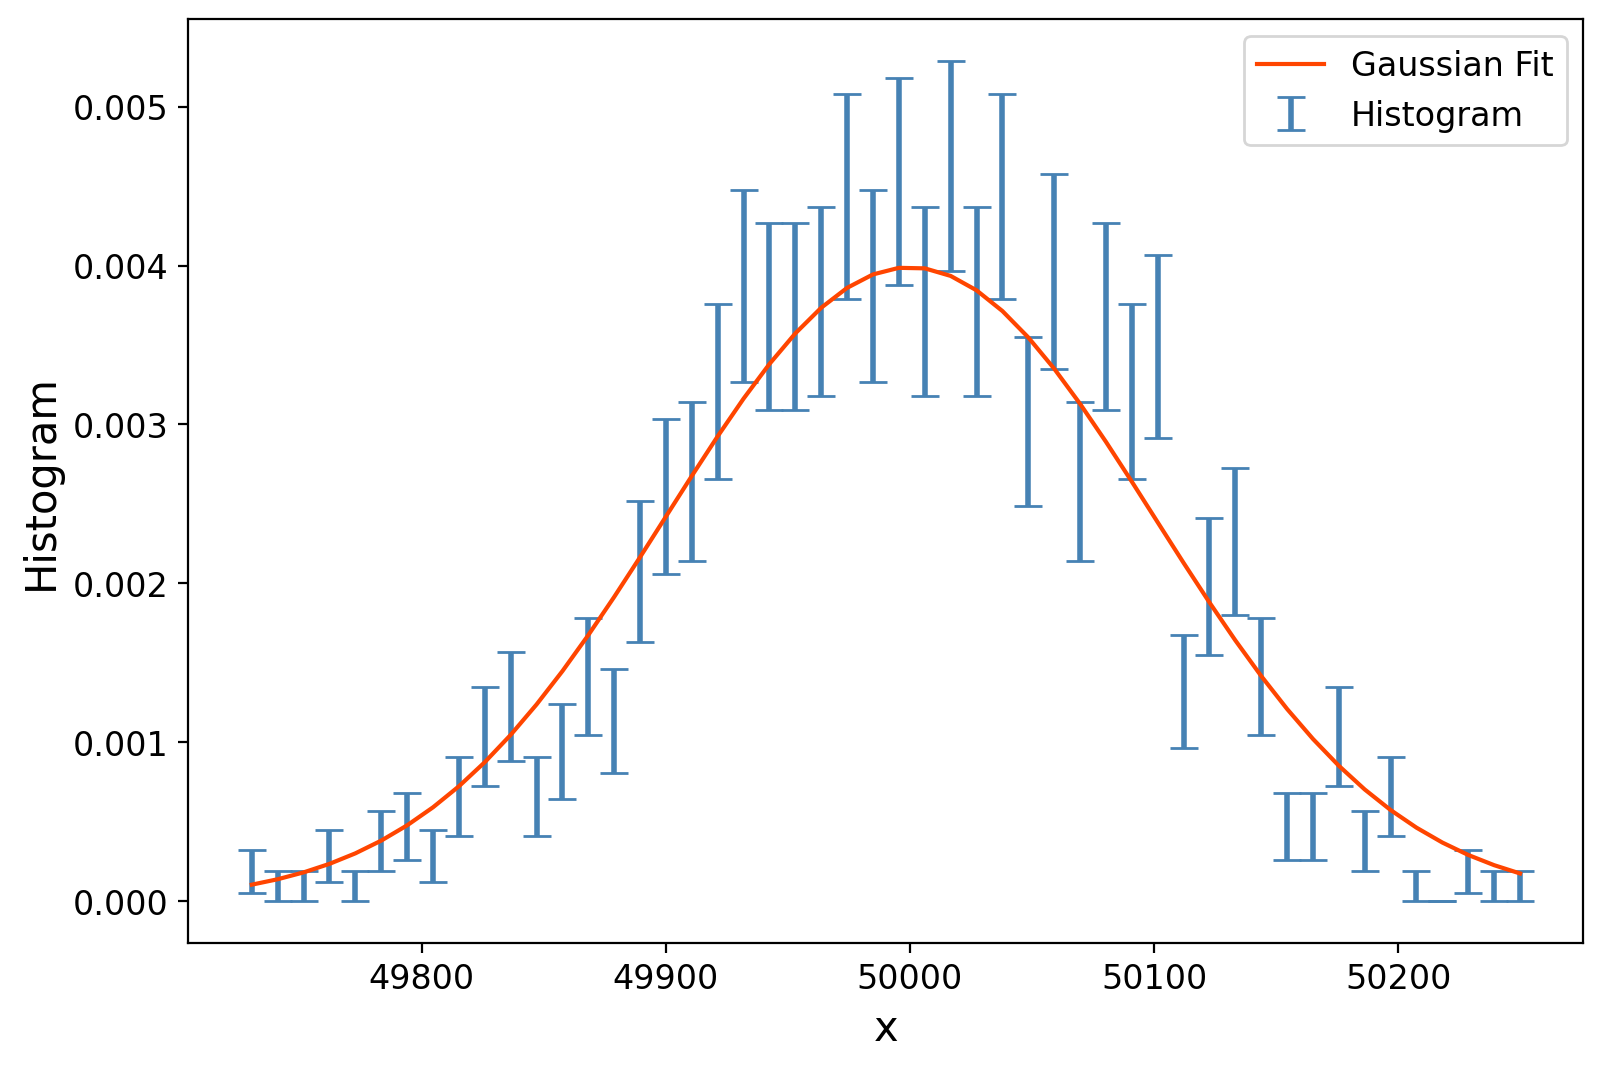

In [ ]:
def chi_sqr(x):
    x0,sigma = x
    return np.sum((
        hist - norm.pdf(bin_centers,loc=x0,scale=sigma)
    )**2/hist_err**2)

x0,sigma = minimize(chi_sqr,[50000,100]).x

plt.figure()

plt.errorbar(bin_centers,hist,hist_err,
             color='steelblue',fmt=' ',
             elinewidth=2,capsize=5,
             label='Histogram')
plt.plot(bin_centers,norm.pdf(bin_centers,loc=x0,scale=sigma),
         color='orangered',label='Gaussian Fit')

plt.xlabel('x')
plt.ylabel('Histogram')

plt.legend()

plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 49
    # variables        = 2
    chi-square         = 53.9672967
    reduced chi-square = 1.14824036
    Akaike info crit   = 8.73133950
    Bayesian info crit = 12.5149801
    R-squared          = -456048.309
[[Variables]]
    x0:     49998.7100 +/- 2.94837519 (0.01%) (init = 50000)
    sigma:  87.3710840 +/- 2.23419649 (2.56%) (init = 100)


<Figure size 900x600 with 0 Axes>

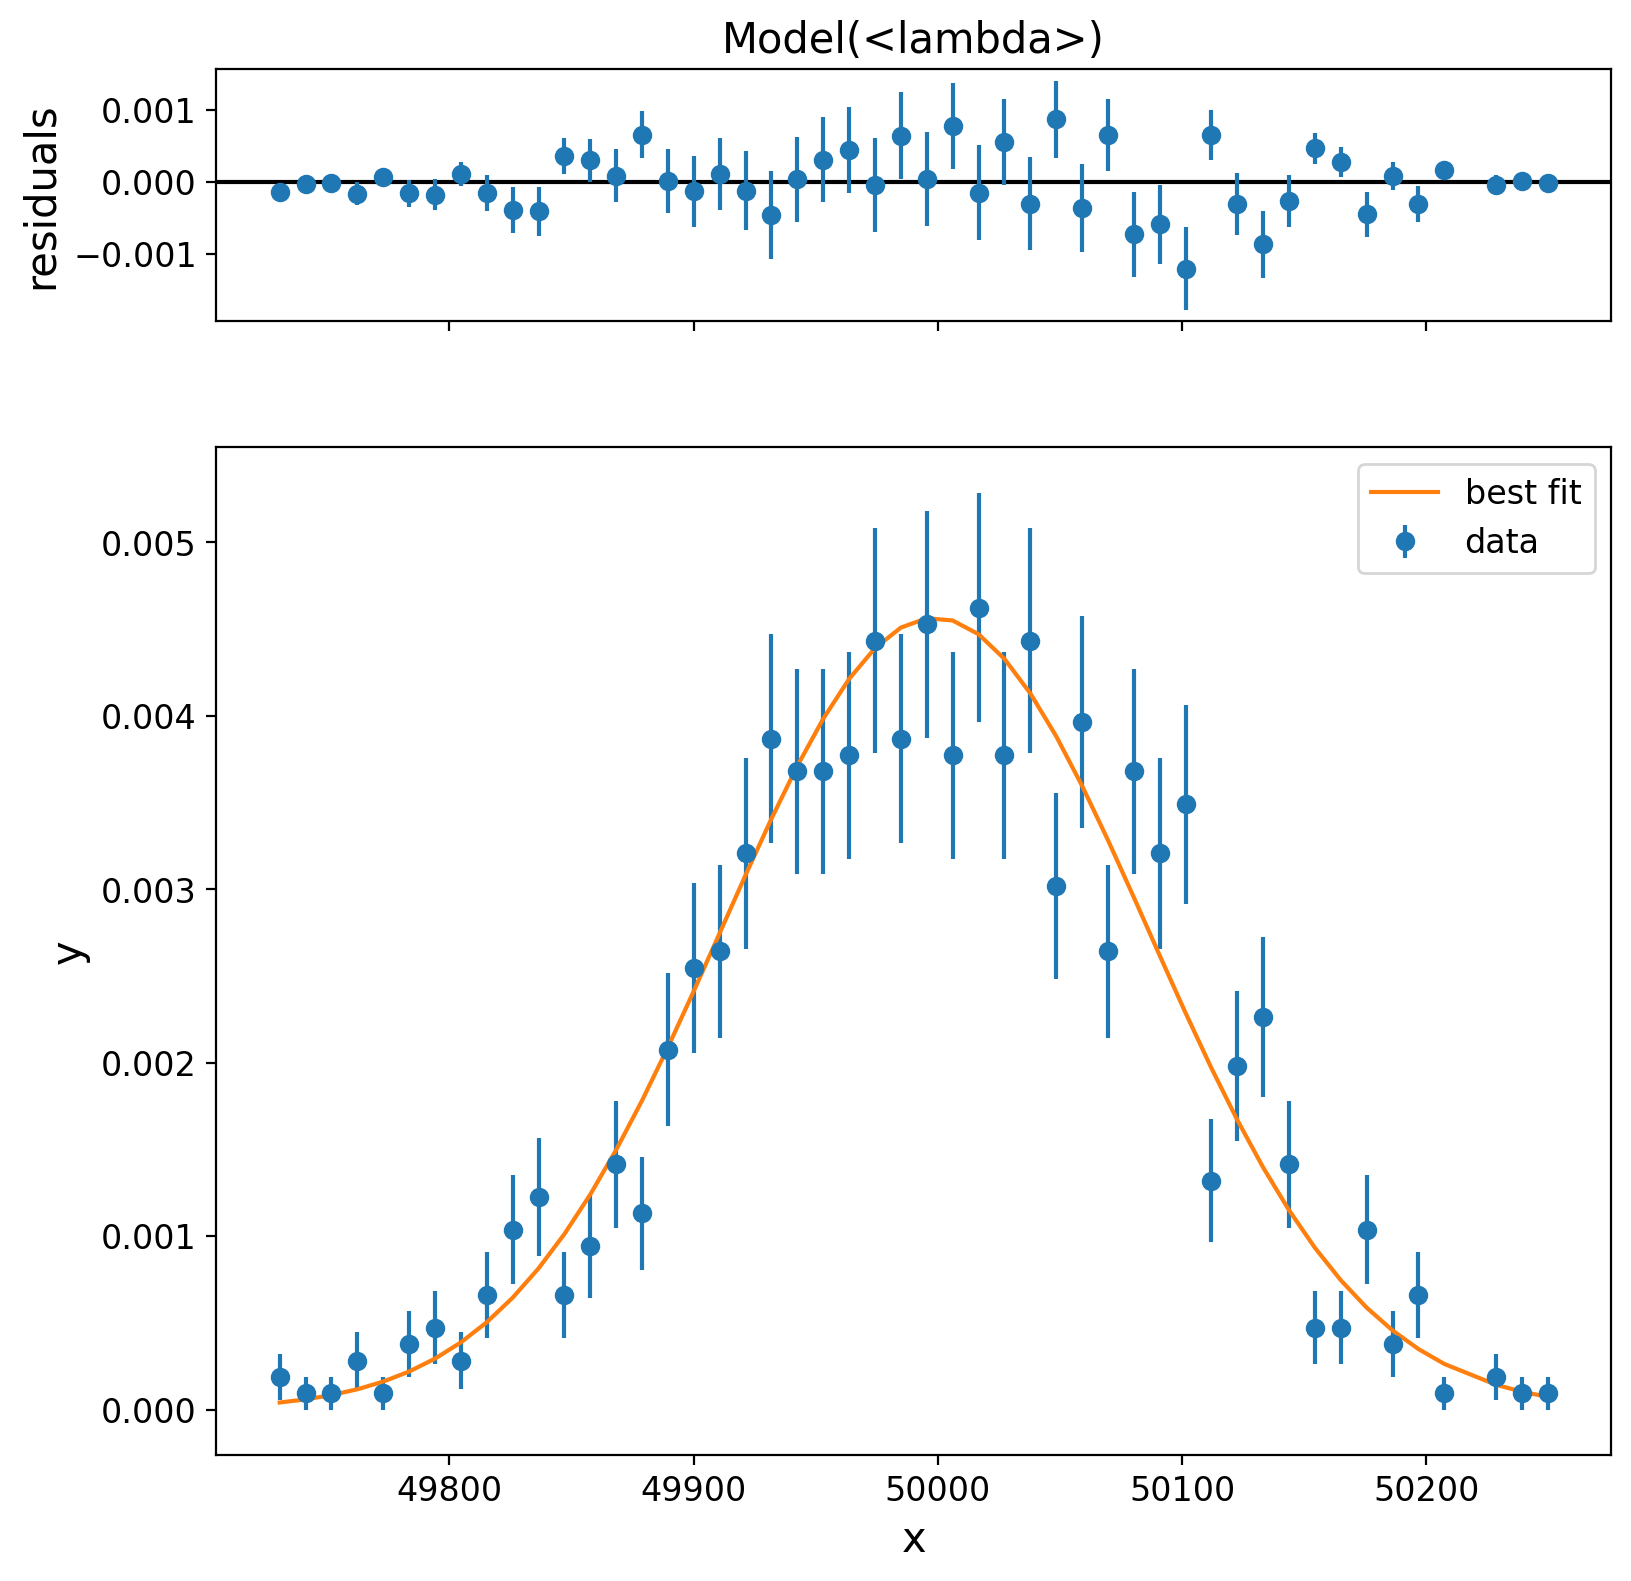

In [ ]:
model = lmfit.Model(lambda x,x0,sigma: norm.pdf(x,loc=x0,scale=sigma))
params = model.make_params(x0=50000, sigma=100)
mask = hist != 0
result = model.fit(
    data = hist[mask],
    params = params,
    x = bin_centers[mask],
    weights = 1/hist_err[mask]
)

x0 = result.params['x0'].value #.stderr
sigma = result.params['sigma'].value #.stderr

lmfit.report_fit(result)

plt.figure()

result.plot()

plt.show()

## Monte Carlo

In [ ]:
n = 100000

xs = np.random.uniform(low=-2,high=2,size=n)
ys = np.random.uniform(low=-2,high=2,size=n)

in_mask = xs**2 + ys**2 <= 1
out_mask = np.array([not i for i in in_mask])

x_in = xs[in_mask]
y_in = ys[in_mask]

x_out = xs[out_mask]
y_out = ys[out_mask]

pi = x_in.shape[0]/n*16
sigma_pi = np.sqrt(x_in.shape[0])/n*16
print(f'pi = {pi} +/- {sigma_pi}')

print('real pi = 3.14159265359')

pi = 3.10544 +/- 0.022290589942843594
real pi = 3.14159265359


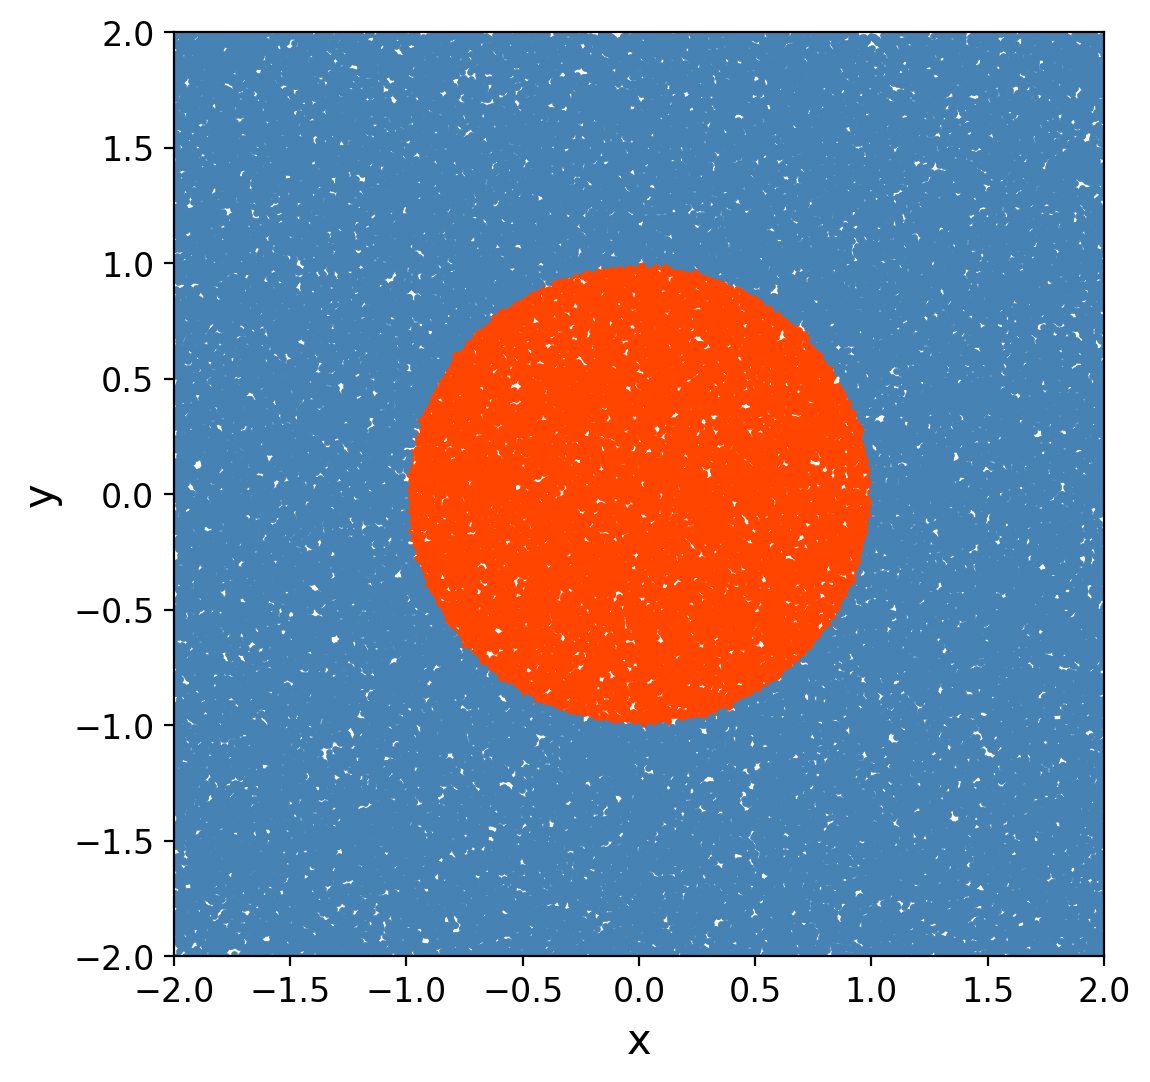

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(x_in,y_in,s=2,color='orangered')
plt.scatter(x_out,y_out,s=2,color='steelblue')

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()